<a href="https://colab.research.google.com/github/Anikethb05/Quantum-Computing/blob/main/Lab_8_Michelson's_interferometer_1RVU23CSE056.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Michelson's interferometer
 #### Aniketh Bhargav
 #### 1RVU23CSE056

In [103]:
# !pip install qiskit qiskit-aer pylatexenc

In [104]:
from qiskit import QuantumCircuit
from qiskit_aer import quantum_info, AerSimulator
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
from numpy import pi
import numpy as np
from IPython.display import display
from qiskit.visualization import plot_histogram

Objective: To understand how a simple quantum circuit (H-P(φ)-H) models physical interferometers and to observe quantum interference patterns through simulation.

In [105]:
phi_values = [0, pi/4, pi/2, 3*pi/4, pi, 5*pi/4, 6*pi/4, 7*pi/4, 2*pi]

In [106]:
simulator=AerSimulator()

Task 1: Build the circuit H – P(φ) – H – Measurement for φ = 0, with initial state of the qubit set to |0⟩.

In [107]:
def interferometer(phi, initial_state='0'):
    qc = QuantumCircuit(1)
    if initial_state == '1':
        qc.x(0)
    qc.h(0)
    qc.p(phi, 0)
    qc.h(0)
    qc.measure_all()

    # Get probabilities
    state = Statevector.from_instruction(qc.remove_final_measurements(inplace=False))
    probs = state.probabilities_dict()
    return probs, qc

Task 2: Repeat for φ = π/4,  π/2, 3π/4, π, 5π/4, 6π/4, 7π/4, and 2π.

Circuits for initial state |0⟩:
φ = 0.00 rad, Probabilities:  P(|0⟩) = 1.000, P(|1⟩) = 0.000


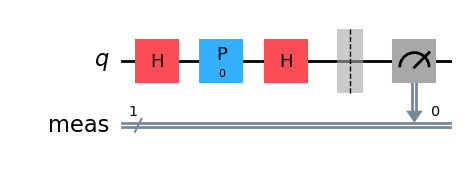

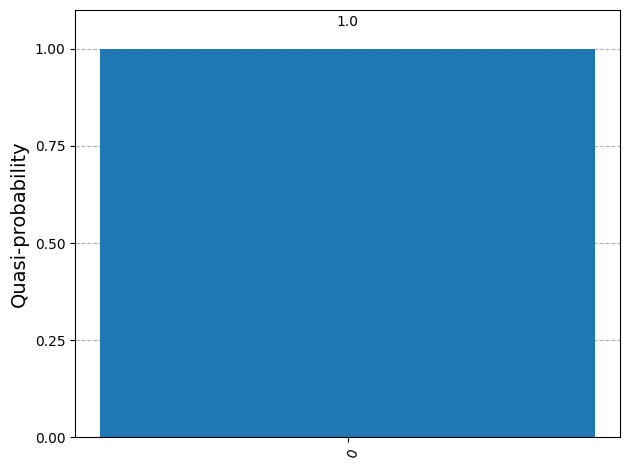

φ = 0.79 rad, Probabilities:  P(|0⟩) = 0.854, P(|1⟩) = 0.146


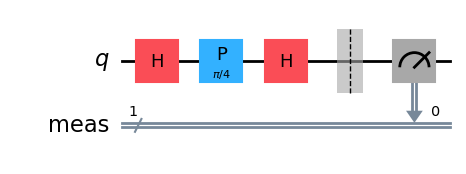

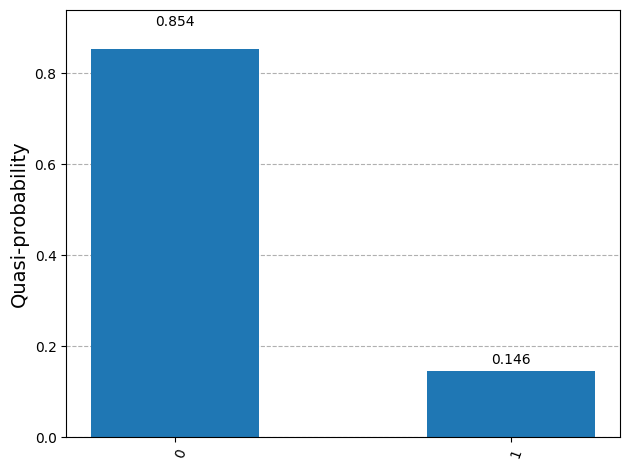

φ = 1.57 rad, Probabilities:  P(|0⟩) = 0.500, P(|1⟩) = 0.500


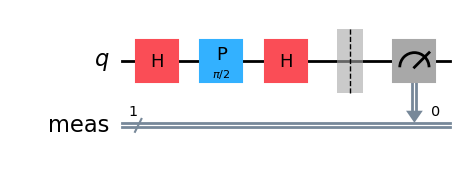

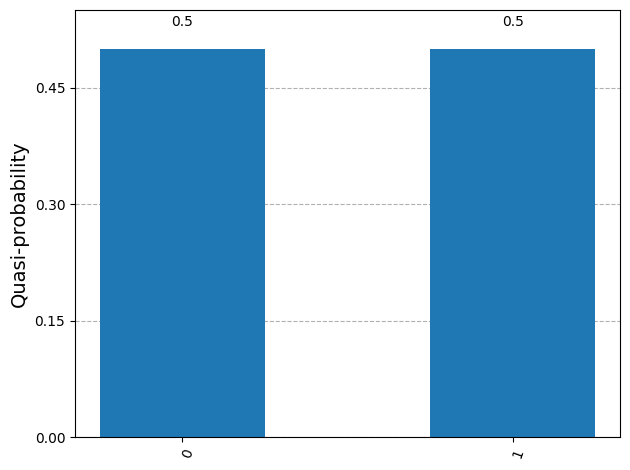

φ = 2.36 rad, Probabilities:  P(|0⟩) = 0.146, P(|1⟩) = 0.854


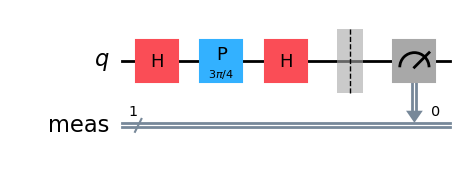

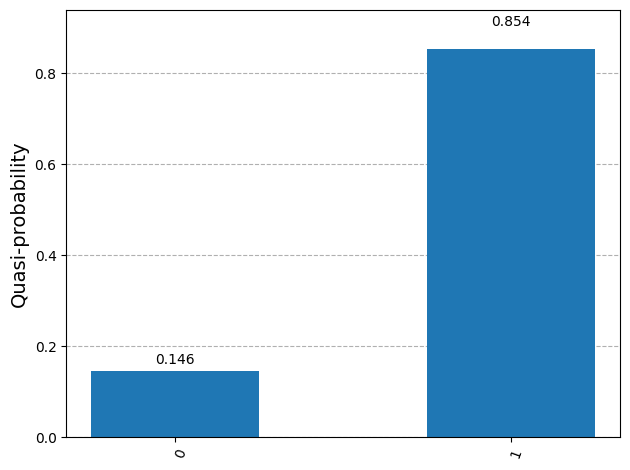

φ = 3.14 rad, Probabilities:  P(|0⟩) = 0.000, P(|1⟩) = 1.000


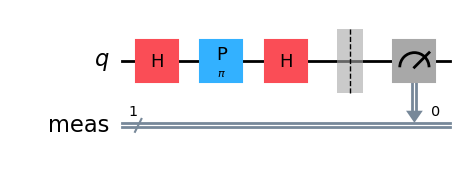

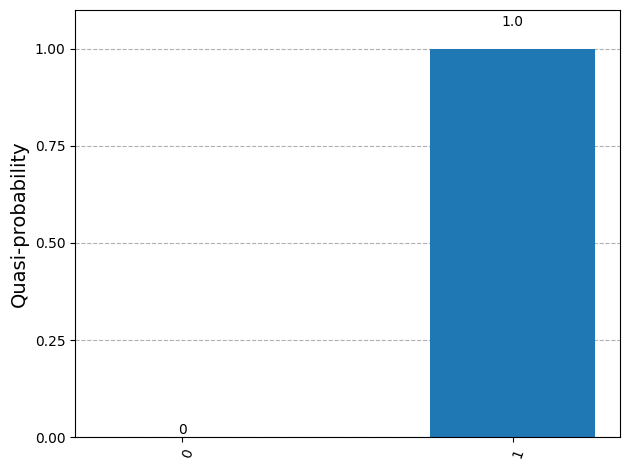

φ = 3.93 rad, Probabilities:  P(|0⟩) = 0.146, P(|1⟩) = 0.854


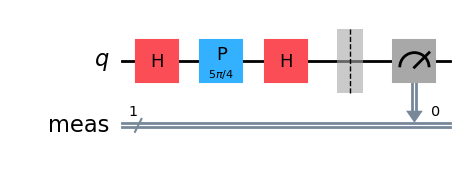

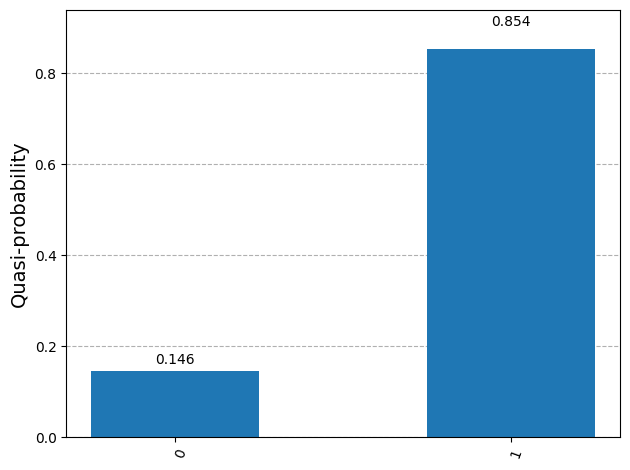

φ = 4.71 rad, Probabilities:  P(|0⟩) = 0.500, P(|1⟩) = 0.500


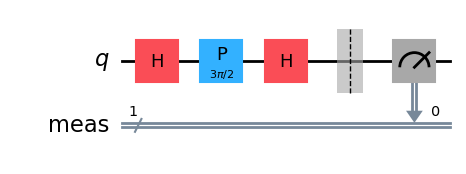

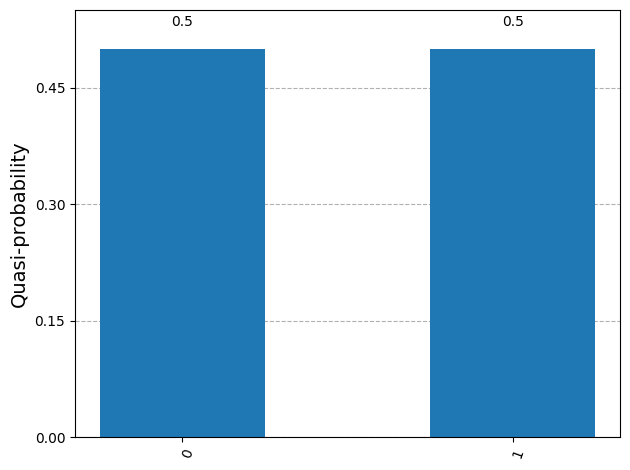

φ = 5.50 rad, Probabilities:  P(|0⟩) = 0.854, P(|1⟩) = 0.146


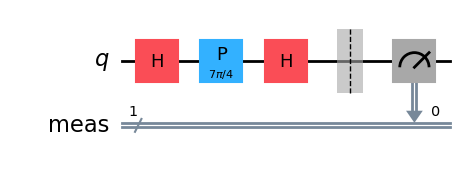

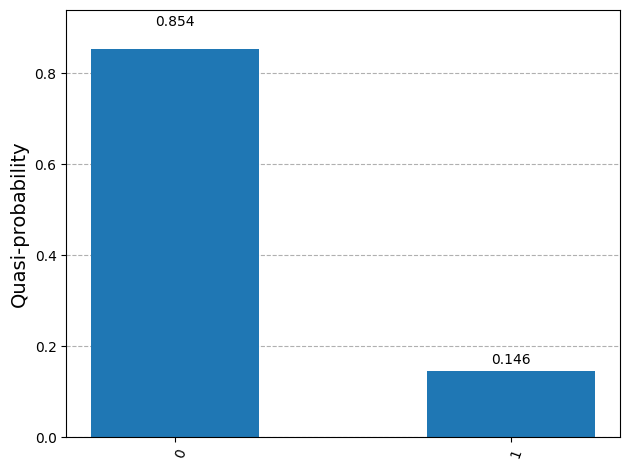

φ = 6.28 rad, Probabilities:  P(|0⟩) = 1.000, P(|1⟩) = 0.000


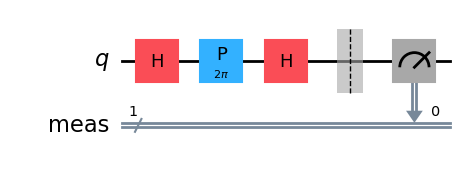

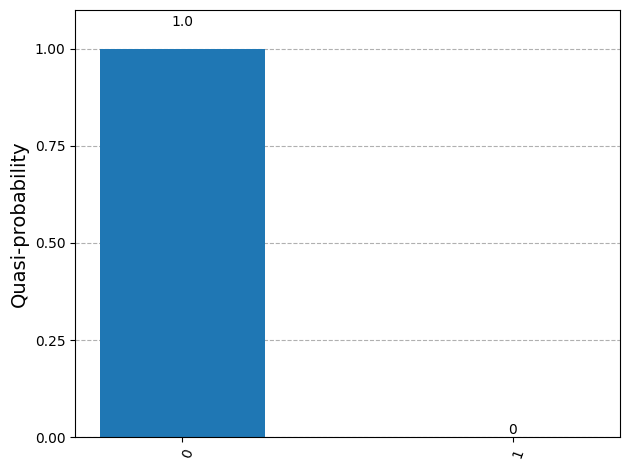

In [108]:
print("Circuits for initial state |0⟩:")
for phi in phi_values:
    probs, qc = interferometer(phi, '0')
    p0 = float(probs.get('0', 0))
    p1 = float(probs.get('1', 0))
    print(f"φ = {phi:.2f} rad, Probabilities:  P(|0⟩) = {p0:.3f}, P(|1⟩) = {p1:.3f}")
    display(qc.draw(output='mpl'))
    display(plot_histogram(probs))

Task 3: What happens if you start with initial state |1⟩ instead of |0⟩?


Circuits for initial state |1⟩:
φ = 0.00 rad, Probabilities:  P(|0⟩) = 0.000, P(|1⟩) = 1.000


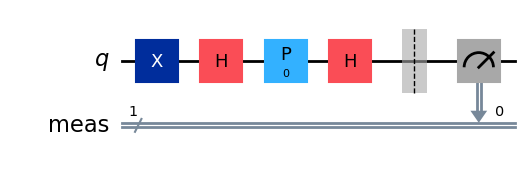

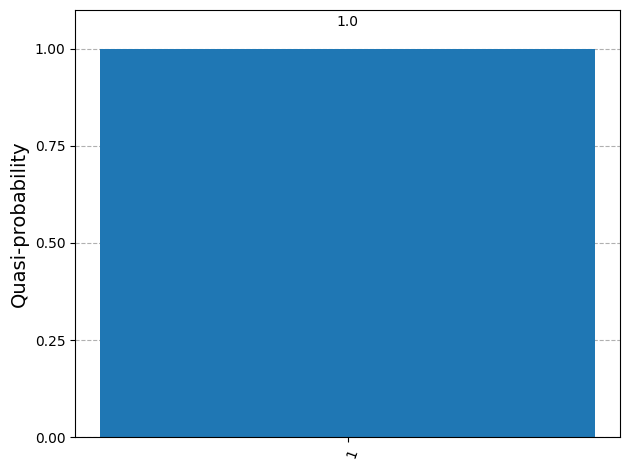

φ = 0.79 rad, Probabilities:  P(|0⟩) = 0.146, P(|1⟩) = 0.854


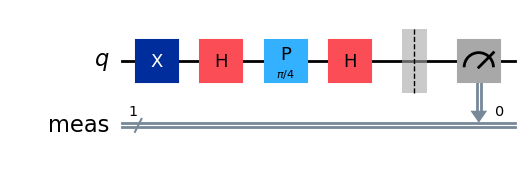

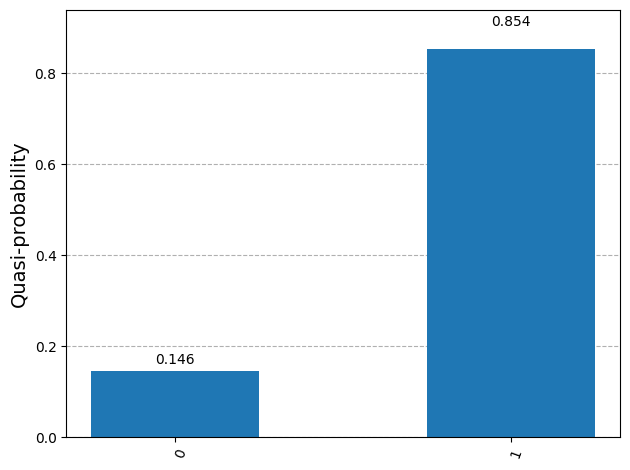

φ = 1.57 rad, Probabilities:  P(|0⟩) = 0.500, P(|1⟩) = 0.500


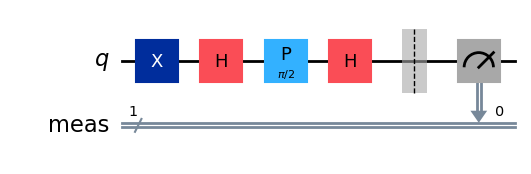

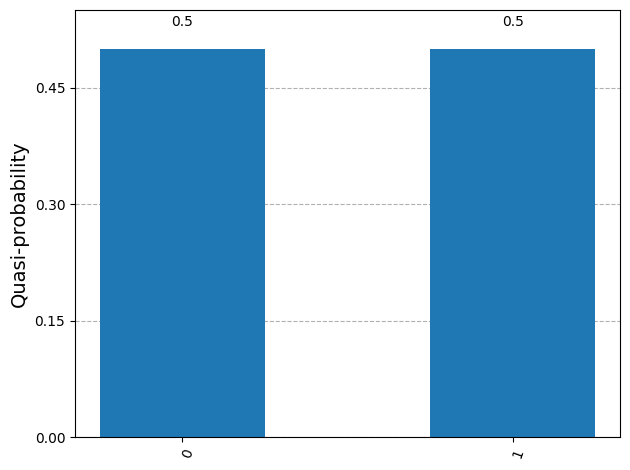

φ = 2.36 rad, Probabilities:  P(|0⟩) = 0.854, P(|1⟩) = 0.146


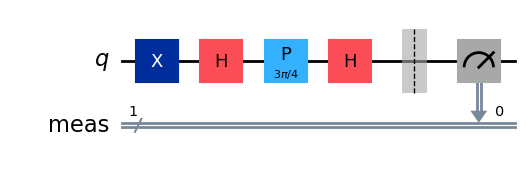

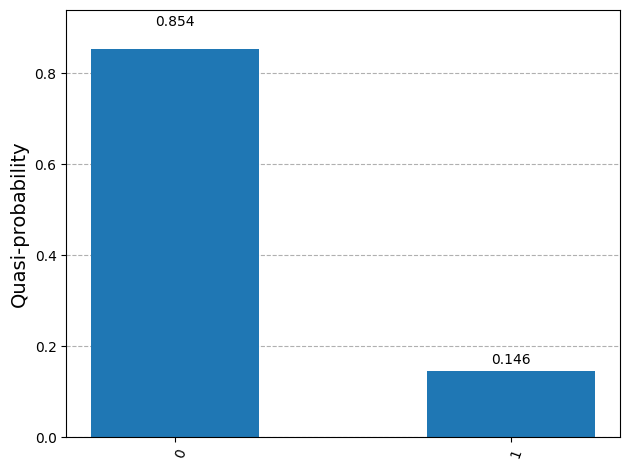

φ = 3.14 rad, Probabilities:  P(|0⟩) = 1.000, P(|1⟩) = 0.000


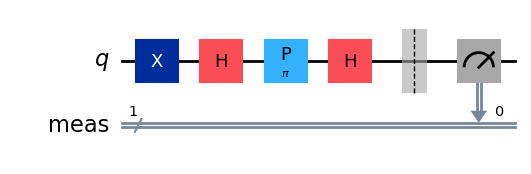

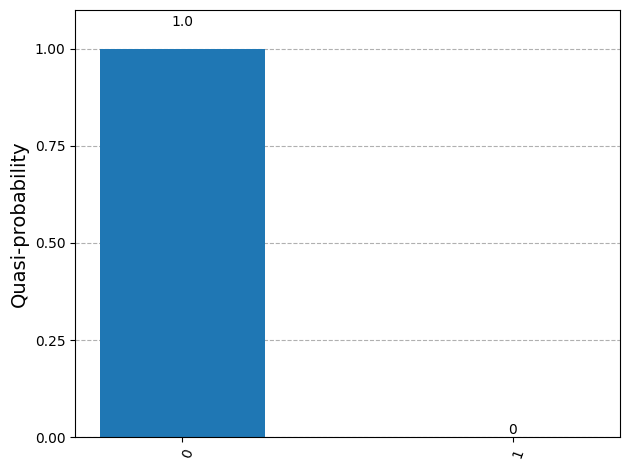

φ = 3.93 rad, Probabilities:  P(|0⟩) = 0.854, P(|1⟩) = 0.146


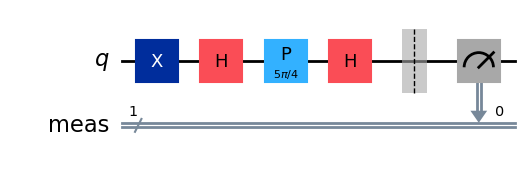

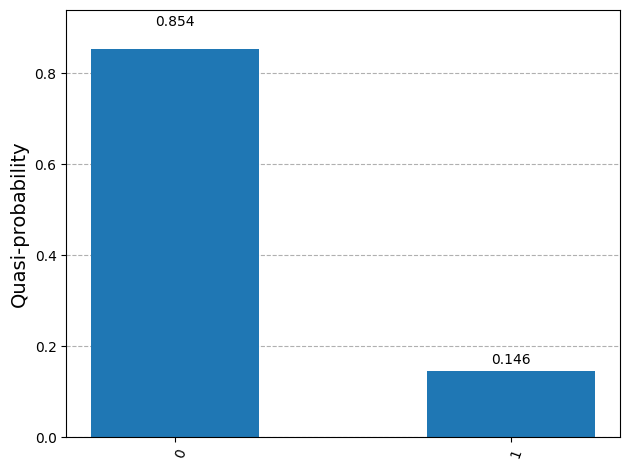

φ = 4.71 rad, Probabilities:  P(|0⟩) = 0.500, P(|1⟩) = 0.500


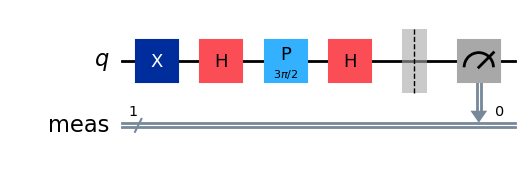

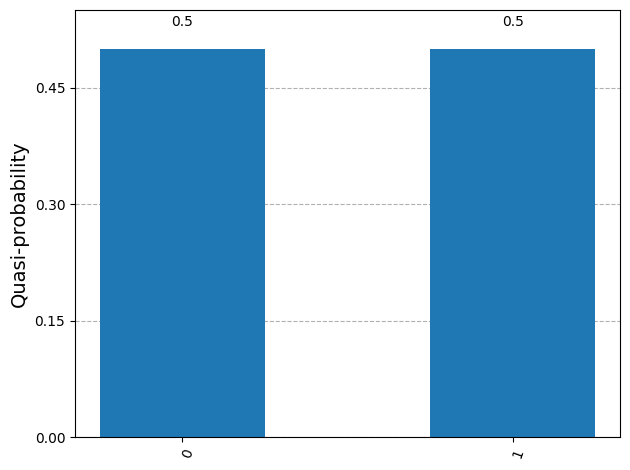

φ = 5.50 rad, Probabilities:  P(|0⟩) = 0.146, P(|1⟩) = 0.854


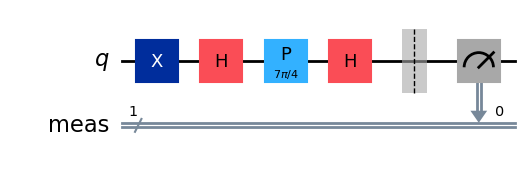

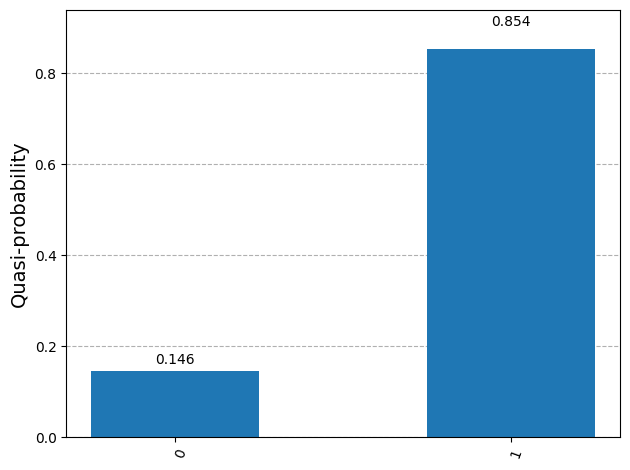

φ = 6.28 rad, Probabilities:  P(|0⟩) = 0.000, P(|1⟩) = 1.000


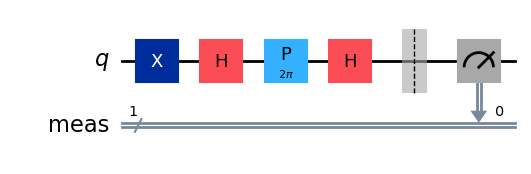

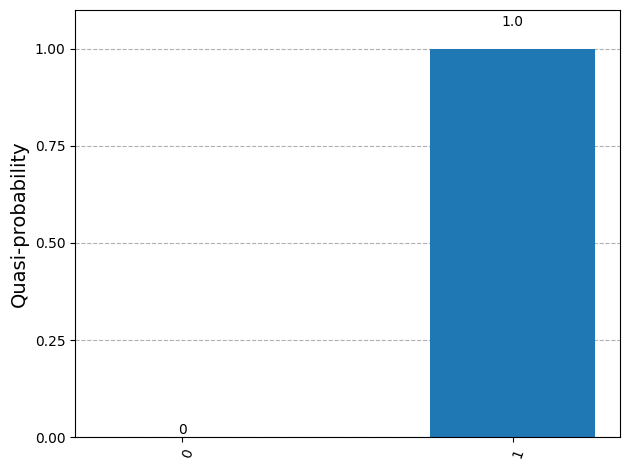

In [109]:
print("\nCircuits for initial state |1⟩:")
for phi in phi_values:
    probs, qc = interferometer(phi, '1')
    p0 = float(probs.get('0', 0))
    p1 = float(probs.get('1', 0))
    print(f"φ = {phi:.2f} rad, Probabilities:  P(|0⟩) = {p0:.3f}, P(|1⟩) = {p1:.3f}")
    display(qc.draw(output='mpl'))
    display(plot_histogram(probs))

The phase gate P(φ) applies the phase only to the |1⟩ state in the circuit. In a physical interferometer, does it matter which arm gets the phase shift? Explain why/why not.

No, it doesn’t matter which arm gets the phase shift, because only the difference in phase between the two arms affects the interference pattern. In the quantum circuit, the phase gate
𝑃
(
𝜑
)
 adds a phase only to the
∣1⟩ state, just like adding a phase to one arm of the interferometer. If you added the same phase to both arms, it would have no effect because a global phase does not change measurement outcomes. What matters is the relative phase, which determines how the two paths interfere when they recombine.